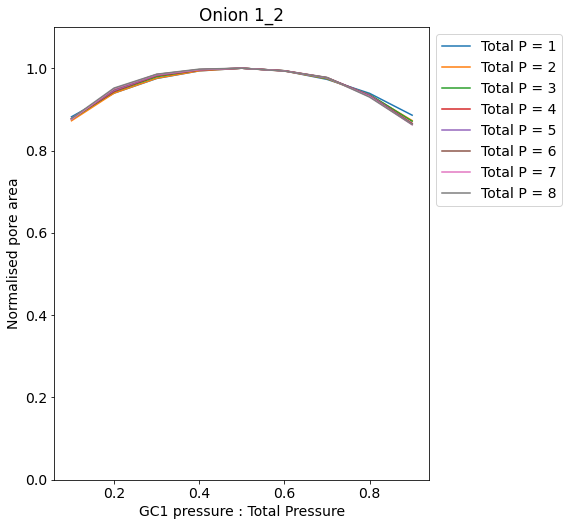

In [42]:
## Code for running Figure 3b

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

path_to_data = "../data/"

plt.rcParams.update({'font.size': 14})

def calculate_ratio(df, maxP, exp):
    df["ratio"] = df["Left GC Pressure"] / maxP
    df["Area norm"] = (df["Area"]) / (df["Area"].max())
    return df

fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111)

for i in range(1,9):
    results = pd.read_csv(path_to_data + "output_" + str(i) + ".csv")
    results = results[~(results["Left GC Pressure"] == 0) & ~np.isclose(results["Right GC Pressure"], 0)]
    max_ratio = calculate_ratio(results, i, 1_2)
    ax.plot(max_ratio["ratio"].to_numpy(), max_ratio["Area norm"].to_numpy(), label='Total P = ' + str(i))

# Move the legend to the right side of the plot
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout to make room for the legend
plt.tight_layout()
ax.set_xlabel("GC1 pressure : Total Pressure")
ax.set_ylabel("Normalised pore area")
ax.set_title("Onion 1_2")
plt.ylim(0,1.1)

plt.savefig("../Figures/Onion_1_2_normalised.svg", bbox_inches='tight')
plt.show()


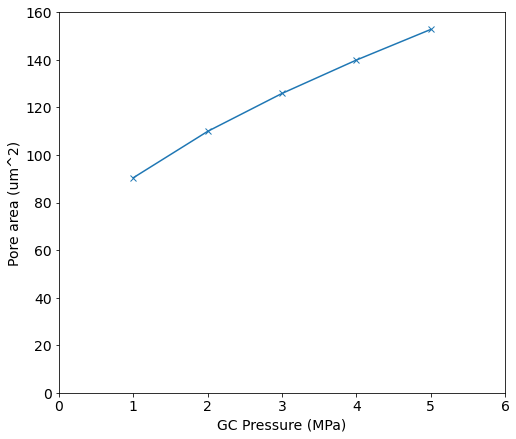

In [41]:
## Figure S2a

fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111)

figs2a = pd.read_csv(path_to_data + "S2a.csv")
figs2a = figs2a[(figs2a["Left GC Pressure"]!= 0) & (figs2a["Left GC Pressure"]<6)]
plt.plot(figs2a["Left GC Pressure"].to_numpy(), figs2a["Area"].to_numpy() ,'-x')
plt.xlim(0, 6)
plt.ylim(0,160)
plt.xlabel("GC Pressure (MPa)")
plt.ylabel("Pore area (um^2)")
plt.show()

In [ ]:
#To extract the stress values at each coordinate in a tensor, you'll likely want to focus on the eVal1, eVal2, and eVal3 columns, which are the eigenvalues of the stress tensor at each coordinate. These eigenvalues represent the magnitude of stress in the principal directions (as described by the eigenvectors), and they will give you the stress values at each point in space.

#eVal1 is typically the largest eigenvalue, indicating the most significant stress direction.
#eVal2 and eVal3 correspond to the other two stress directions.
#If you're interested in the overall stress at each coordinate, you might consider combining these eigenvalues into a single measure, like the trace of the stress tensor (sum of the eigenvalues), or the maximum eigenvalue (eVal1) if you're specifically interested in the most dominant stress direction.

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


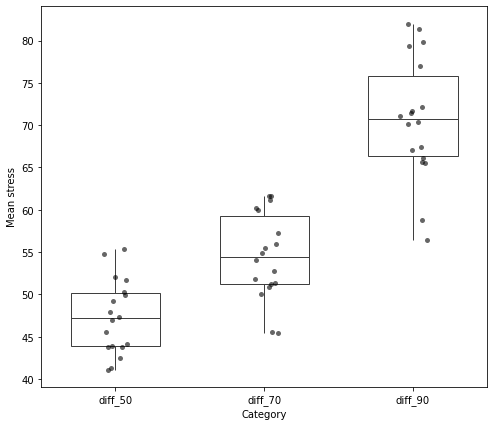

In [5]:
import numpy as np
import pandas as pd

path_to_data = "../Software/Onion/output/"
def calculate_mean_top10_stress(path_to_data):
    stress_tensor = pd.read_csv(path_to_data)
    stress_trace = stress_tensor[" eVal1"] + stress_tensor[" eVal2"] + stress_tensor[" eVal3"]
    flattened_stress = stress_trace.values.flatten()
    percentile_90 = np.percentile(flattened_stress, 90)
    top_10_stress = flattened_stress[flattened_stress > percentile_90]
    mean_stress = np.mean(top_10_stress)
    return mean_stress

## 1_2

meshes = ["1_2","1_3","1_4","1_5","1_6","1_8","2_1","2_3","2_4","2_6a","2_6b","2_7a","3_1","3_2","3_3","3_4","3_6","3_7"]

diff_50 = []
diff_70 = []
diff_90 = []

for mesh in meshes:
    mean_stress = calculate_mean_top10_stress(path_to_data + "stress_" + mesh + "_50.csv")
    diff_50.append(mean_stress)

    mean_stress = calculate_mean_top10_stress(path_to_data + "stress_" + mesh + "_70.csv")
    diff_70.append(mean_stress)

    mean_stress = calculate_mean_top10_stress(path_to_data + "stress_"  + mesh + "_90.csv")
    diff_90.append(mean_stress)

## Box plot of the three differential pressures@ diff_50, diff_70, diff_90
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame for easier plotting with seaborn
data = pd.DataFrame({
    'Stress': diff_50 + diff_70 + diff_90,
    'Category': ['diff_50'] * len(diff_50) + ['diff_70'] * len(diff_70) + ['diff_90'] * len(diff_90)
})

fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(111)
sns.boxplot(x='Category', y='Stress', data=data, ax=ax, whis=[0, 100], width=0.6, showcaps=False, boxprops={'facecolor':'None'})
sns.stripplot(x='Category', y='Stress', data=data, ax=ax, jitter=True, color='black', alpha=0.6)
plt.xlabel("Category")
plt.ylabel("Mean stress")
plt.show()

In [6]:
## Save diff_50, diff_70, diff_90 to a csv file

data = pd.DataFrame([diff_50, diff_70, diff_90]).T
data.columns = ["50:50", "70:30", "90:10"]

data.to_csv("../Software/Onion/output/differential_pressure.csv", index=False)